In [ ]:
### There is not linearity thats why its giving inaccurate evaluation scores, 

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures

**Creating the dataset**

In [4]:
df = pd.read_csv(r"C:\Users\User\Downloads\polynomial_regression_data.csv")

In [5]:
df

,x,y
0,-10.000000,252.640523
1,-9.797980,230.396328
2,-9.595960,227.740140
3,-9.393939,232.082945
4,-9.191919,220.234094
...,...,...
95,9.191919,153.472731
96,9.393939,153.415377
97,9.595960,178.235707
98,9.797980,168.875998


In [6]:
X = df['x']
y = df['y']

In [7]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=23)

In [8]:
X_train

85    7.171717
28   -4.343434
8    -8.383838
11   -7.777778
63    2.727273
        ...   
31   -3.737374
54    0.909091
73    4.747475
40   -1.919192
83    6.767677
Name: x, Length: 80, dtype: float64

**Model Building**

In [9]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [10]:
model = sm.OLS(y_train , X_train).fit()

In [11]:
y_pred = model.predict(X_test)
y_pred

26     87.822670
80     53.654557
82     52.389071
68     61.247471
77     55.552785
37     80.862499
3     102.375755
55     69.473128
20     91.619127
17     93.517355
72     58.716499
24     89.088156
71     59.349242
87     49.225357
89     47.959871
29     85.924441
9      98.579298
67     61.880214
42     77.698784
94     44.796157
dtype: float64

**Evaluation**

In [12]:
r2_score(y_test , y_pred)

0.10911134165739911

In [13]:
mean_squared_error(y_test , y_pred)

2890.0881901076878

In [14]:
np.sqrt(mean_squared_error(y_test , y_pred))

53.759540456626745

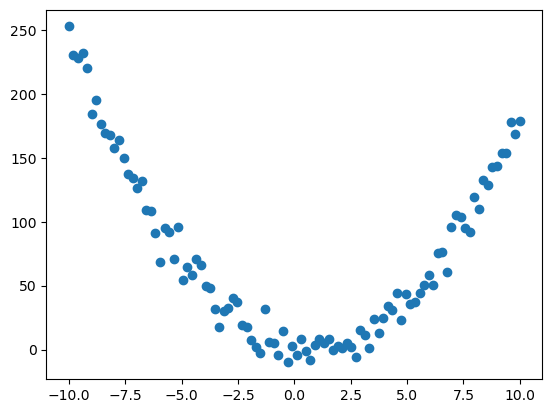

In [15]:
plt.scatter(X, y)  #There is Linear relationship between input and target

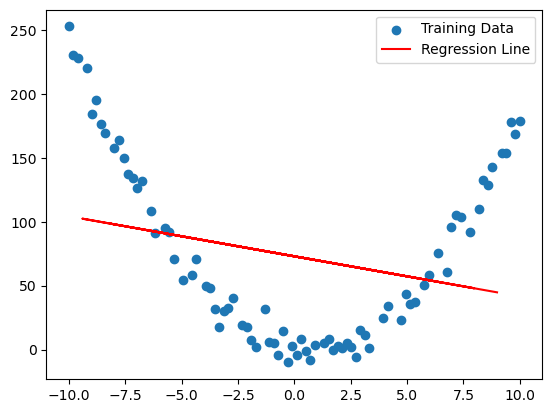

In [17]:
plt.scatter(X_train['x'] , y_train ,label = 'Training Data')
plt.plot(X_test['x'] , y_pred ,color='red',  label = 'Regression Line')
plt.legend()

**Assumptions**
* Linear Relationship

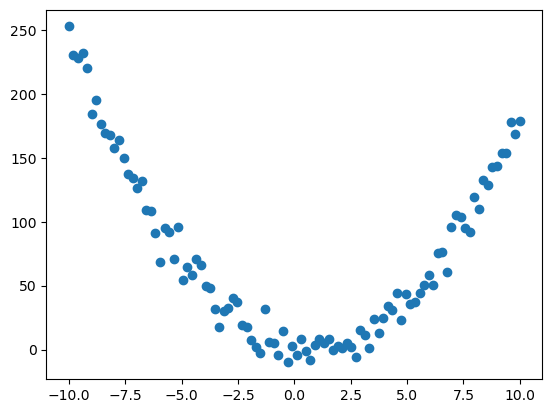

In [18]:
plt.scatter(X,y)

* Independent/Multicolinearity

* Normality

In [19]:
resid = model.resid

<Axes: ylabel='Density'>

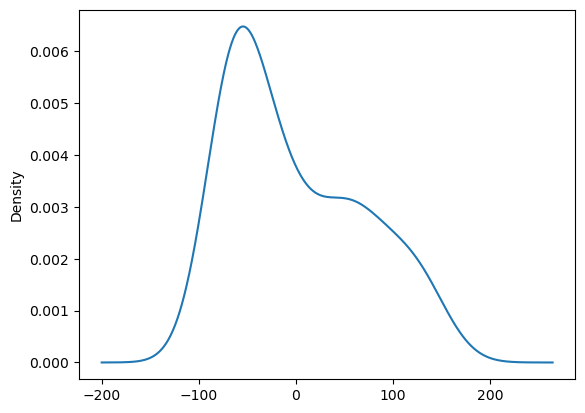

In [20]:
resid.plot(kind='kde')

* Equal varinace / Homoscedasticity

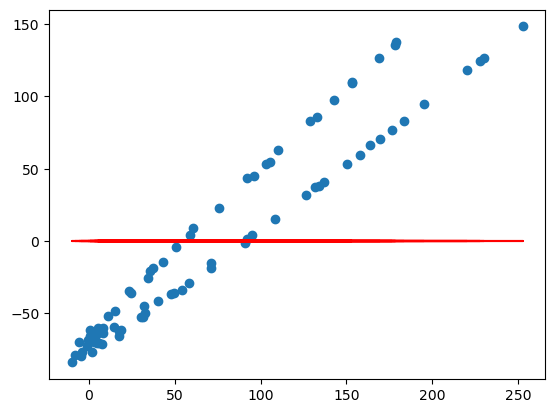

In [21]:
plt.scatter(y_train , resid)
plt.plot(y_train,[0]*y_train , color='red')

* No Auto correlation

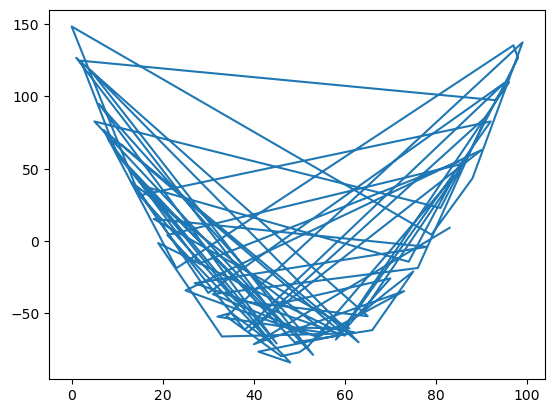

In [22]:
plt.plot(resid.index , resid)

* Error should be independant of input feature
#There should not be relationhip between resuals and inputs

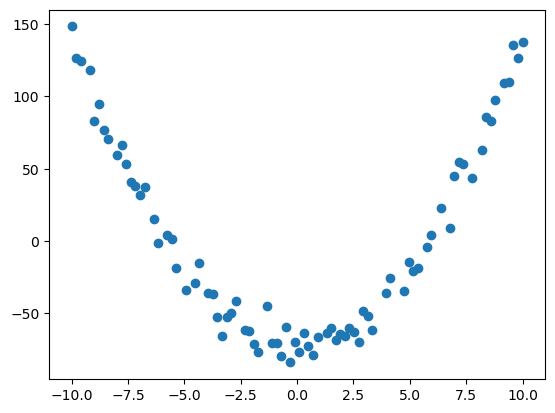

In [24]:
plt.scatter(X_train['x'] ,resid)